In [1963]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1964]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score , mean_squared_error

Data Collection and Processing


In [1965]:
# loading the data from csv file to pandas dataframe
car_data = pd.read_csv('car data.csv')

In [1966]:
# inspecting the first 5 rows of the dataframe
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1967]:
# checking the number of rows and columns
car_data.shape

(301, 9)

In [1968]:
# getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [1969]:
# checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [1970]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Selling_type.value_counts())
print(car_data.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [1971]:
# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
car_data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_24816\2676927969.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_24816\2676927969.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_24816\2676927969.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

In [1972]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


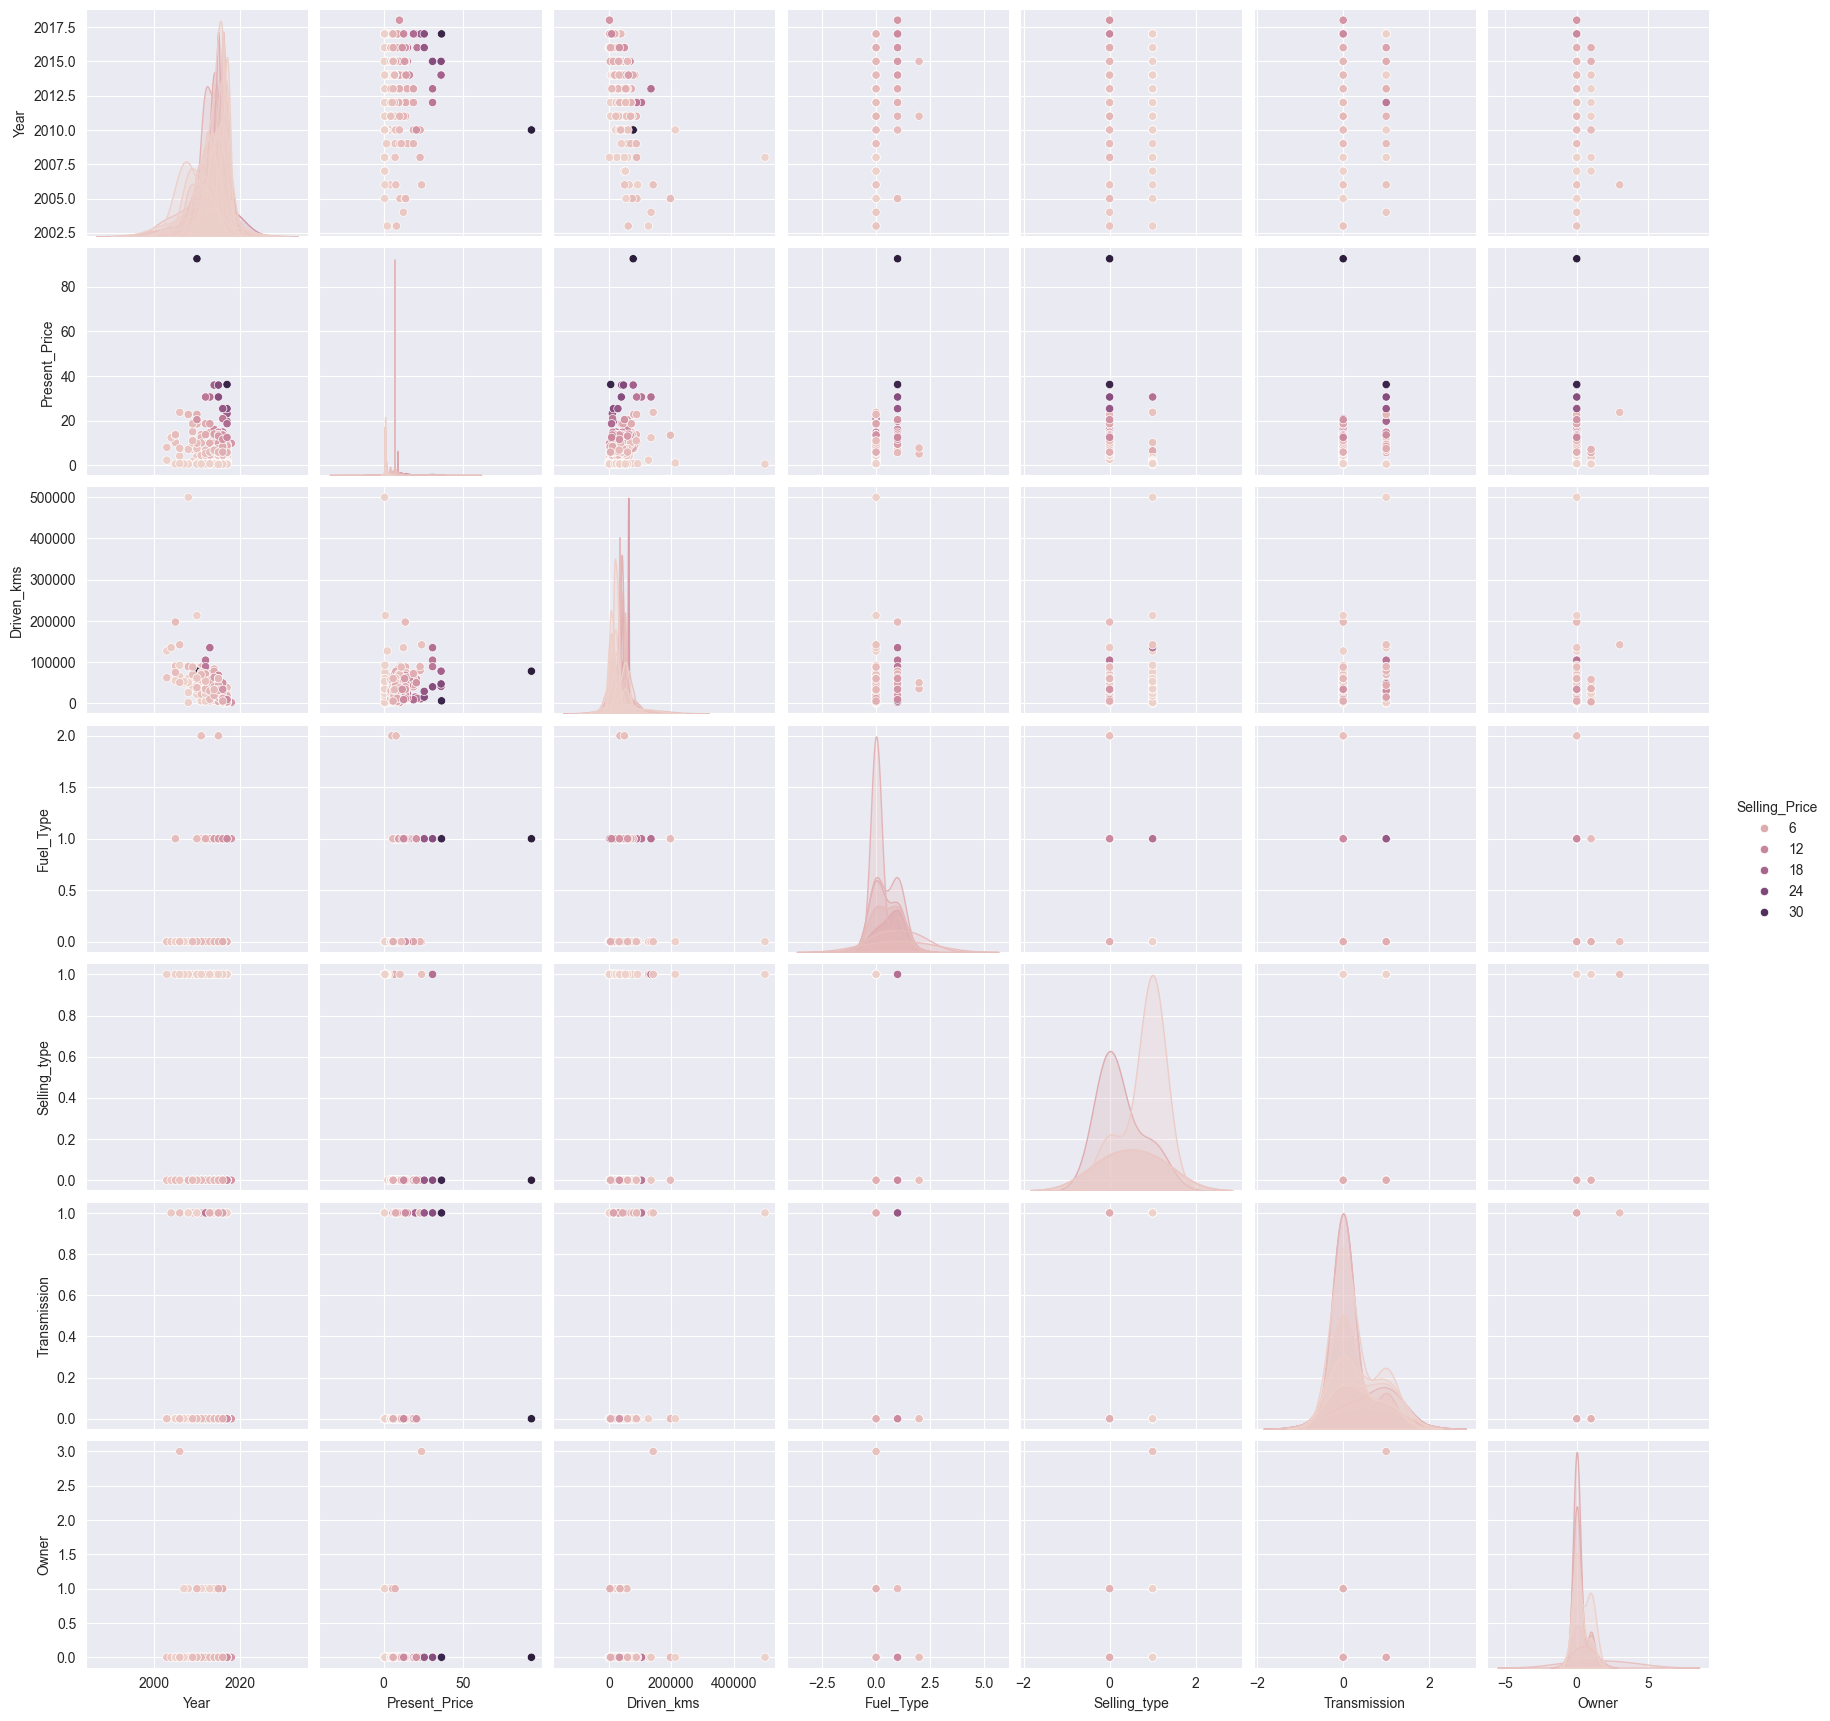

In [1973]:
sns.pairplot(car_data, hue='Selling_Price')


Splitting the Data and Target

In [1974]:
x = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data['Selling_Price']

In [1975]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [1976]:
# loading the linear regression model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1977]:
print('Accuracy:', LinearRegression_model.score(X_train, y_train))

Accuracy: 0.8757287527605648


In [1978]:
# prediction on Testing data
test_pred = LinearRegression_model.predict(X_test)
print(test_pred)

[ 2.8436641   8.17237605  6.15707608 -1.53367831  9.10462893  7.12467453
  1.41050656  0.85717892  1.42604995  7.1876989   8.77484106  0.64628071
  8.19313745  3.27315583  6.58298292  3.12578892  0.4794826  10.71183472
  1.81539839  2.39189445  0.40881692  7.78669553  6.26247852  2.60070218
  0.83962641  3.68450392  5.30473338  2.8219703   2.20519774  1.82262523
  0.41803535  8.85646666 -0.66028595  2.2762067   8.29321586  4.51215559
  7.29693263  7.54571571  2.94902885  7.93017039  3.91484613  4.18070722
  4.31570629  0.69767359  7.02573228  0.53426789  7.32381454 11.09901895
  3.13289222  5.06743589  6.61115574  2.23147409 20.14911522 16.47436818
  7.25817002  9.53990399  4.43946289  8.67499802  1.7604018   7.41193965
  0.27592493 -2.52854384  2.01069635 -1.55536403  4.79133844  1.85804118
 19.80317988 17.88080103  5.42309006 -0.54421517  4.72261199  5.22476315
  5.66028454  4.97568652  2.71514073  1.71498974  1.95779778  9.74957711
  0.88292146  7.76246351  4.48727736  3.32865211  4

In [1979]:
print("R2 Score:", r2_score(y_test, test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, test_pred))



R2 Score: 0.8772443540167406
Mean Squared Error: 3.4953688860106253


Visualization of Actual Prices and Predicted Prices

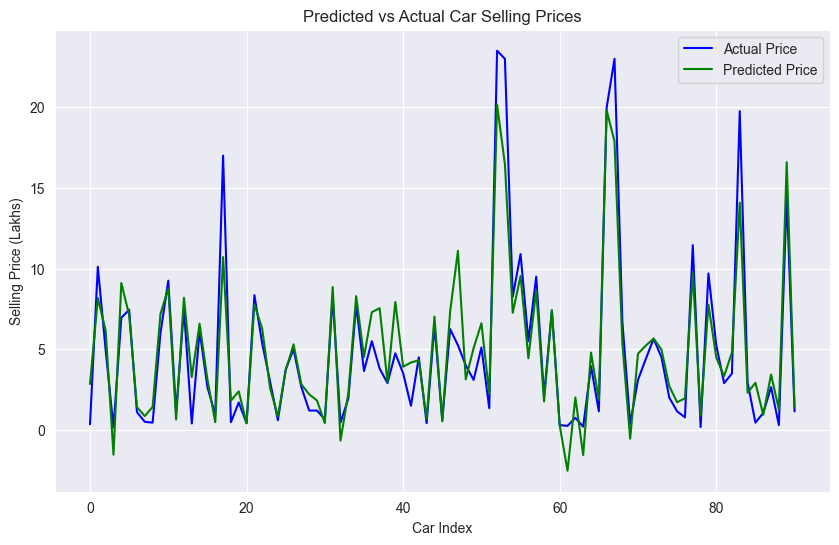

In [1980]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(np.arange(len(y_test)), test_pred, color='green', label='Predicted Price')
plt.xlabel('Car Index')
plt.ylabel('Selling Price (Lakhs)')
plt.title('Predicted vs Actual Car Selling Prices')
plt.legend()
plt.show()


<module 'matplotlib.pyplot' from 'E:\\JupyterProject\\CodeAlpha\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

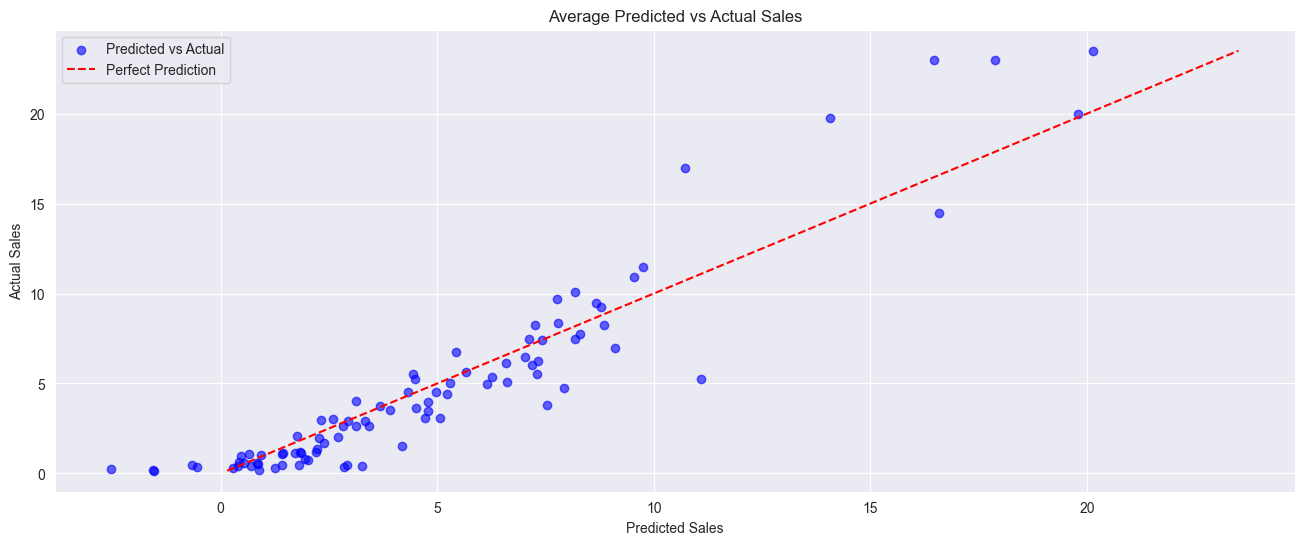

In [1981]:
plt.figure(figsize=(16, 6))
plt.scatter(test_pred , y_test, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Average Predicted vs Actual Sales')
plt.legend()
plt


In [1982]:
analysis = pd.DataFrame({'Predicted': test_pred, 'Actual': y_test})
analysis.head(10)


,Predicted,Actual
177,2.843664,0.35
289,8.172376,10.11
228,6.157076,4.95
198,-1.533678,0.15
60,9.104629,6.95
9,7.124675,7.45
118,1.410507,1.10
154,0.857179,0.50
164,1.426050,0.45
33,7.187699,6.00


Lasso Regression

In [1983]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [1984]:
lass_reg_model.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [1985]:
print('Accuracy:', lass_reg_model.score(X_train, y_train))

Accuracy: 0.8352132508817013


In [1986]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [1987]:
print("R2 Score:", r2_score(y_test, test_data_prediction))
print("Mean Squared Error:", mean_squared_error(y_test, test_data_prediction))



R2 Score: 0.8395049889830422
Mean Squared Error: 4.569967135728412


<module 'matplotlib.pyplot' from 'E:\\JupyterProject\\CodeAlpha\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

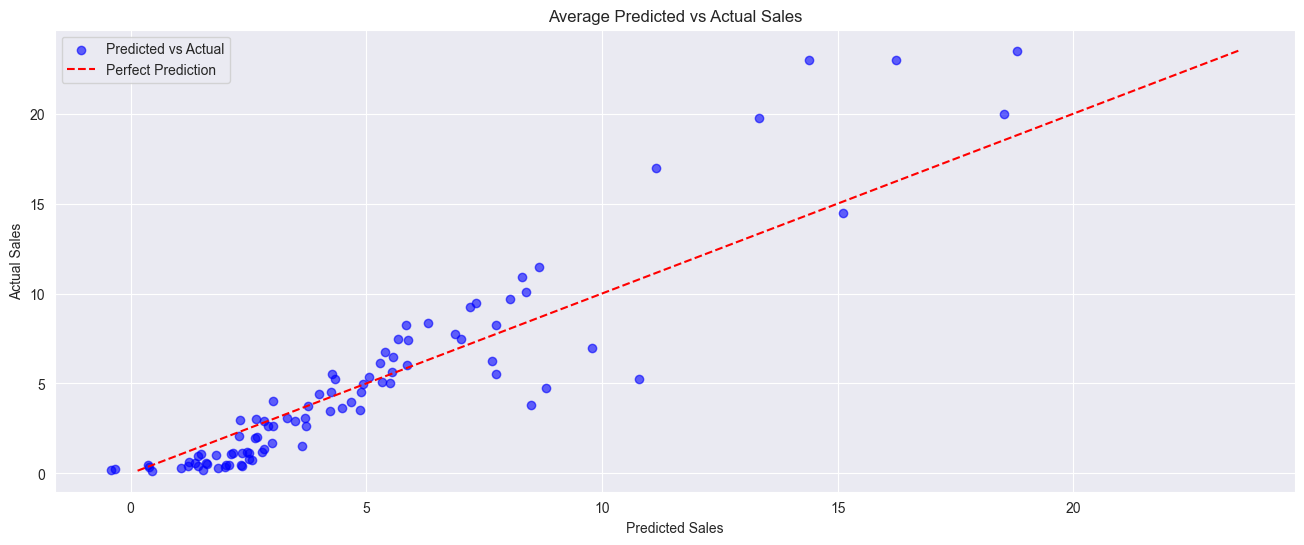

In [1988]:
plt.figure(figsize=(16, 6))
plt.scatter(test_data_prediction, y_test, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Average Predicted vs Actual Sales')
plt.legend()
plt

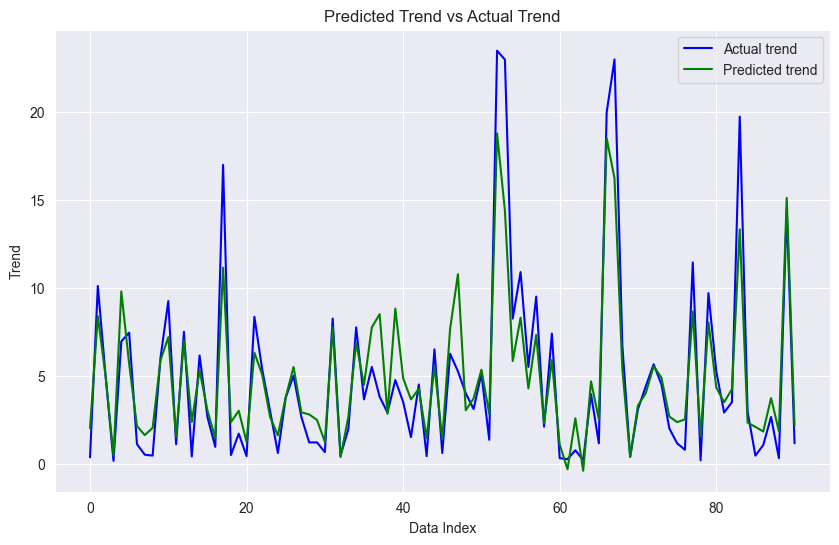

In [1989]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Actual trend')
plt.plot(np.arange(len(y_test)), test_data_prediction, color='green', label='Predicted trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Predicted Trend vs Actual Trend')
plt.legend()
plt.show()

In [1990]:
analysis2= pd.DataFrame({'Actual': y_test, 'Predicted': test_data_prediction})
analysis2.head(10)

,Actual,Predicted
177,0.35,1.999983
289,10.11,8.387469
228,4.95,4.936723
198,0.15,0.449376
60,6.95,9.797833
9,7.45,5.680159
118,1.10,2.128116
154,0.50,1.616122
164,0.45,2.027421
33,6.00,5.868814
